# Chapter.5 모델 평가와 성능 향상

In [7]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------------------------

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수 : 0.88


# 5.1 교차 검증

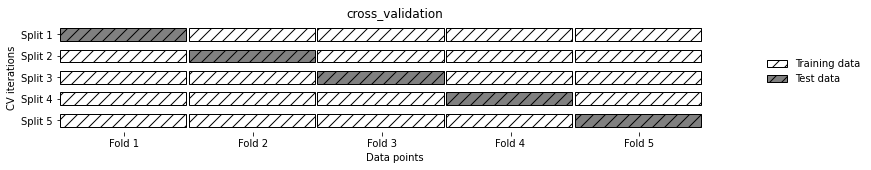

In [8]:
mglearn.plots.plot_cross_validation()

# 5.1.1 scikit-learn의 교차 검증

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [12]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [15]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [18]:
print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))
# score은 여러 값이 저장되어 있는 array이기 때문에 mean을 통해 평균을 구할 수 있다.

교차 검증 평균 점수 : 0.97


In [19]:
from sklearn.model_selection import cross_validate

In [22]:
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.02562141, 0.02846336, 0.02093363, 0.02094793, 0.01795793]),
 'score_time': array([0.00102019, 0.00099874, 0.00099254, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [24]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : ', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.025621,0.001020,0.966667,0.966667
1,0.028463,0.000999,1.000000,0.966667
2,0.020934,0.000993,0.933333,0.983333
3,0.020948,0.000000,0.966667,0.983333
4,0.017958,0.000000,1.000000,0.975000


평균 시간과 점수 :  fit_time       0.022785
score_time     0.000602
test_score     0.973333
train_score    0.975000
dtype: float64


# 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

▼ 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않다. (의 예시)

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

print('Iris 레이블 : \n', iris.target)

Iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


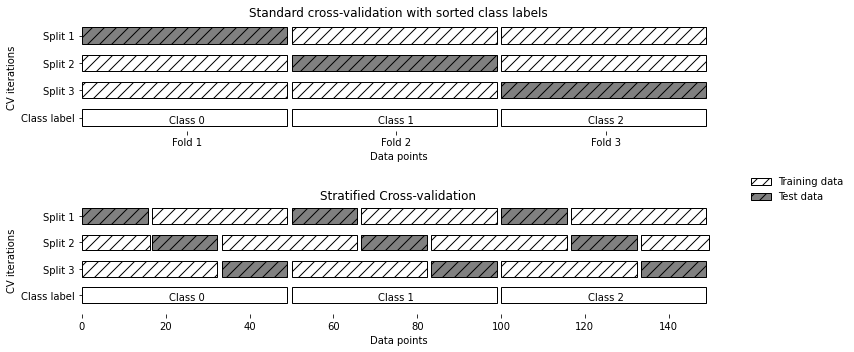

In [26]:
mglearn.plots.plot_stratified_cross_validation()

### 교차 검증 상세 옵션

In [35]:
from sklearn.model_selection import KFold

In [36]:
kfold = KFold(n_splits=5)
print('교차 검증 점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 : 
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [37]:
# irist sets을 삼등분 하면 안되는 이유

kfold = KFold(n_splits=3)
print('교차 검증점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증점수 : 
 [0. 0. 0.]


In [39]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수 : ', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 :  [0.98 0.96 0.96]


### LOOCV

In [42]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)    #cv에 적용함
print('교차 검증 분할 횟수 : ',len(scores))
print('평균 정확도 : {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


### 임의 분할 교차 검증

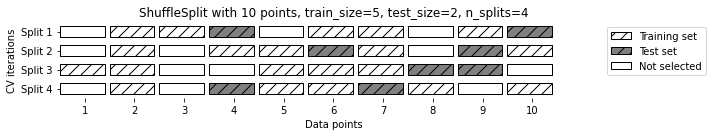

In [43]:
mglearn.plots.plot_shuffle_split()

In [46]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96       0.97333333 0.97333333 0.96       0.93333333 0.93333333
 0.97333333 0.97333333 1.         0.96      ]


### 그룹별 교차 검증

In [55]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]

scores = cross_val_score(logreg, X, y, groups, cv=KFold(n_splits=3))
print('교차 검증 점수 : \n', scores)

교차 검증 점수 : 
 [0.75 0.75 0.75]


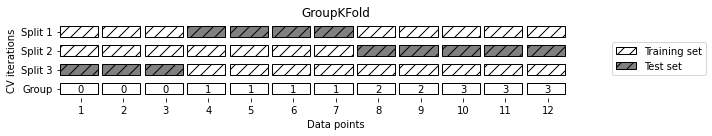

In [56]:
mglearn.plots.plot_group_kfold()

# 5.1.4 (한국어판 부록) 반복 교차 검증

In [59]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [60]:
iris = load_iris()
logreg = LogisticRegression()

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print('교차 검증 점수 : \n',scores)
print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))

교차 검증 점수 : 
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.96


# 5.2 그리드 서치

# 5.2.1 간단한 그리드 서치

In [64]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_